In [2]:
#Importing Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Loading Data
df=pd.read_csv('Amazon_-_Movies_and_TV_Ratings[1].csv')

In [4]:
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


<AxesSubplot:ylabel='Frequency'>

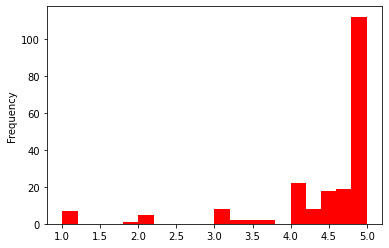

In [6]:
#ploting the mean frequency
df.describe().T['mean'].plot(bins=20, kind='hist', color = 'red')

<AxesSubplot:ylabel='Frequency'>

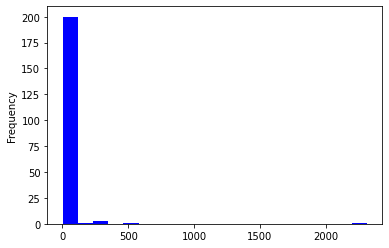

In [7]:
#ploting the count frequency
df.describe().T['count'].plot(bins=20, kind='hist', color = 'blue')

In [8]:
#Which movies have maximum views/ratings?
df.describe().T['count'].sort_values(ascending=False)[:1].to_frame()

,count
Movie127,2313.0


In [9]:
# What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
df.describe().T['mean'].sort_values(ascending=False).head(5).to_frame()

,mean
Movie1,5.0
Movie55,5.0
Movie131,5.0
Movie132,5.0
Movie133,5.0


In [10]:
#Define the top 5 movies with the least audience.
df.describe().T['count'].sort_values(ascending=True).head(5).to_frame()

,count
Movie1,1.0
Movie71,1.0
Movie145,1.0
Movie69,1.0
Movie68,1.0


# User Based Model Buliding

In [11]:
df1 = df.melt(id_vars = df.columns[0],value_vars=df.columns[1:],var_name="Movies",value_name="Rating").fillna(0)
df1

,user_id,Movies,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,0.0
2,A3LKP6WPMP9UKX,Movie1,0.0
3,AVIY68KEPQ5ZD,Movie1,0.0
4,A1CV1WROP5KTTW,Movie1,0.0
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [12]:
from surprise import Reader
from surprise import accuracy
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import train_test_split 

In [13]:
reader = Reader(rating_scale=(-1,10))

data = Dataset.load_from_df(df1.fillna(0), reader=reader)

In [14]:
trainset, testset = train_test_split(data, test_size=0.25)

In [15]:
algo=SVD()

In [16]:
algo.fit(trainset)

In [17]:
pred=algo.test(testset)

In [18]:
accuracy.rmse(pred)

RMSE: 0.2835


0.2834537916948914

In [55]:
user_id = 'A1KLIKPUF5E88I'
muvi_id = 'Movie6'
r_ui = 5.0
algo.predict(user_id, muvi_id, r_ui=r_ui, verbose=True)

user: A1KLIKPUF5E88I item: Movie6     r_ui = 5.00   est = 0.03   {'was_impossible': False}


Prediction(uid='A1KLIKPUF5E88I', iid='Movie6', r_ui=5.0, est=0.032817449525456094, details={'was_impossible': False})

In [19]:
from surprise.model_selection import cross_validate

In [ ]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

In [56]:
def repeat(algo_type, frame, min_, max_):
    
    reader = Reader(rating_scale=(min_,max_))

    data = Dataset.load_from_df(frame, reader=reader)
    
    algo = algo_type
    
    print(cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True))
    
    print("#"*10)

    user_id = 'A3R5OBKS7OM2IR'
    muvi_id = 'Movie1'
    r_ui = 5.0
    print(algo.predict(user_id, muvi_id, r_ui=r_ui, verbose=True))
    
    print("#"*10)
    print()

In [47]:
df = df.iloc[:2500, :50]
df1 = df.melt(id_vars = df.columns[0], value_vars= df.columns[1:], var_name="movie_name", value_name="rating")

In [57]:
repeat(SVD(), df1.fillna(0), -1, 10)
repeat(SVD(), df1.fillna(df1.mean()), -1, 10)
repeat(SVD(), df1.fillna(df1.median()), -1, 10)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.3468  0.3254  0.3501  0.3407  0.0110  
MAE (testset)     0.0628  0.0609  0.0638  0.0625  0.0012  
Fit time          4.39    4.39    4.45    4.41    0.03    
Test time         0.30    0.30    0.30    0.30    0.00    
{'test_rmse': array([0.34675727, 0.32536687, 0.35009154]), 'test_mae': array([0.06279798, 0.06085733, 0.06378485]), 'fit_time': (4.389007329940796, 4.386024713516235, 4.45005989074707), 'test_time': (0.30182743072509766, 0.30327272415161133, 0.2989945411682129)}
##########
user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.41   {'was_impossible': False}
user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.41   {'was_impossible': False}
##########

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0522  0.0603  0.0728  0.0617  0.0085  
MAE (testse

In [51]:
#trying grid search and find optimum hyperparameter value for n_factors
from surprise.model_selection import GridSearchCV

In [52]:
param_grid = {'n_epochs':[20,30],
             'lr_all':[0.005,0.001],
             'n_factors':[50,100]}

In [58]:
gs = GridSearchCV(SVD,param_grid,measures=['rmse','mae'],cv=3)
gs.fit(data)

In [1]:
gs.bestscore()

NameError: name 'gs' is not defined

In [ ]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])